<h1>Aplicação e Análise de Modelo de regressão linear</h1>

O objetivo dessa atividade é aplicar e analisar um modelo de regressão linear em um experimento realizado pela Cia. KGB.
O experimento traz os resultados encontrados sobre o este de maleabilidade de uma nova película de proteção para um certo tipo de vidro.

Os dados apresentam a flexibilidade dos protótipos (AP, BP e C) em relação à temperatura exposta.

## Importação das bibliotecas necessárias para a análise

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.stats import linregress, normaltest
import statsmodels.api as sm
# linear regression model
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm
import seaborn as sns

#### função para plotagem dos gráficos dos modelos de regressão linear

In [40]:
matplotlib.rcParams["figure.dpi"] = 300

def plot_model(x, y, result, title):
    
    plt.plot(x, y.values, 'o', label='dados originais')
    plt.plot(x, result.params[0] + result.params[1]*x, 'r', 
             label='linha de tendência'
             )
    plt.ylabel(y.name)
    plt.xlabel('Temperatura (graus C)')
    plt.legend()
    plt.title(title)
    plt.figure(figsize=(10, 6))
    plt.show()

## Importação e leitura dos dados

In [41]:
df = pd.read_csv('data.csv', sep=';', decimal=',')

df.head()

,Temperatura (graus C),Prototipo AP,Prototipo BP,Prototipo C
0,1,5.0,9.38,11.1
1,2,6.0,9.12,11.5
2,3,3.4,9.60,10.9
3,4,2.7,9.80,10.5
4,5,10.0,9.00,10.9


In [42]:
data = df.rename(columns={'Prototipo AP': 'Prototipo_AP', 
                          'Temperatura (graus C)': 'Temperatura',
                          'Prototipo BP': 'Prototipo_BP',
                          'Prototipo C': 'Prototipo_C'
                          })

## Diagrama de dispersão entre os protótipos e a temperatura

<p>
Nesses diagramas não é possível inferir que existe um relação diretamente linear entre os Protótipos AP e a Temperatura exposta, entretanto, os Protótipos dos tipos BP e C já se aproximam mais dessa relação.
</p>

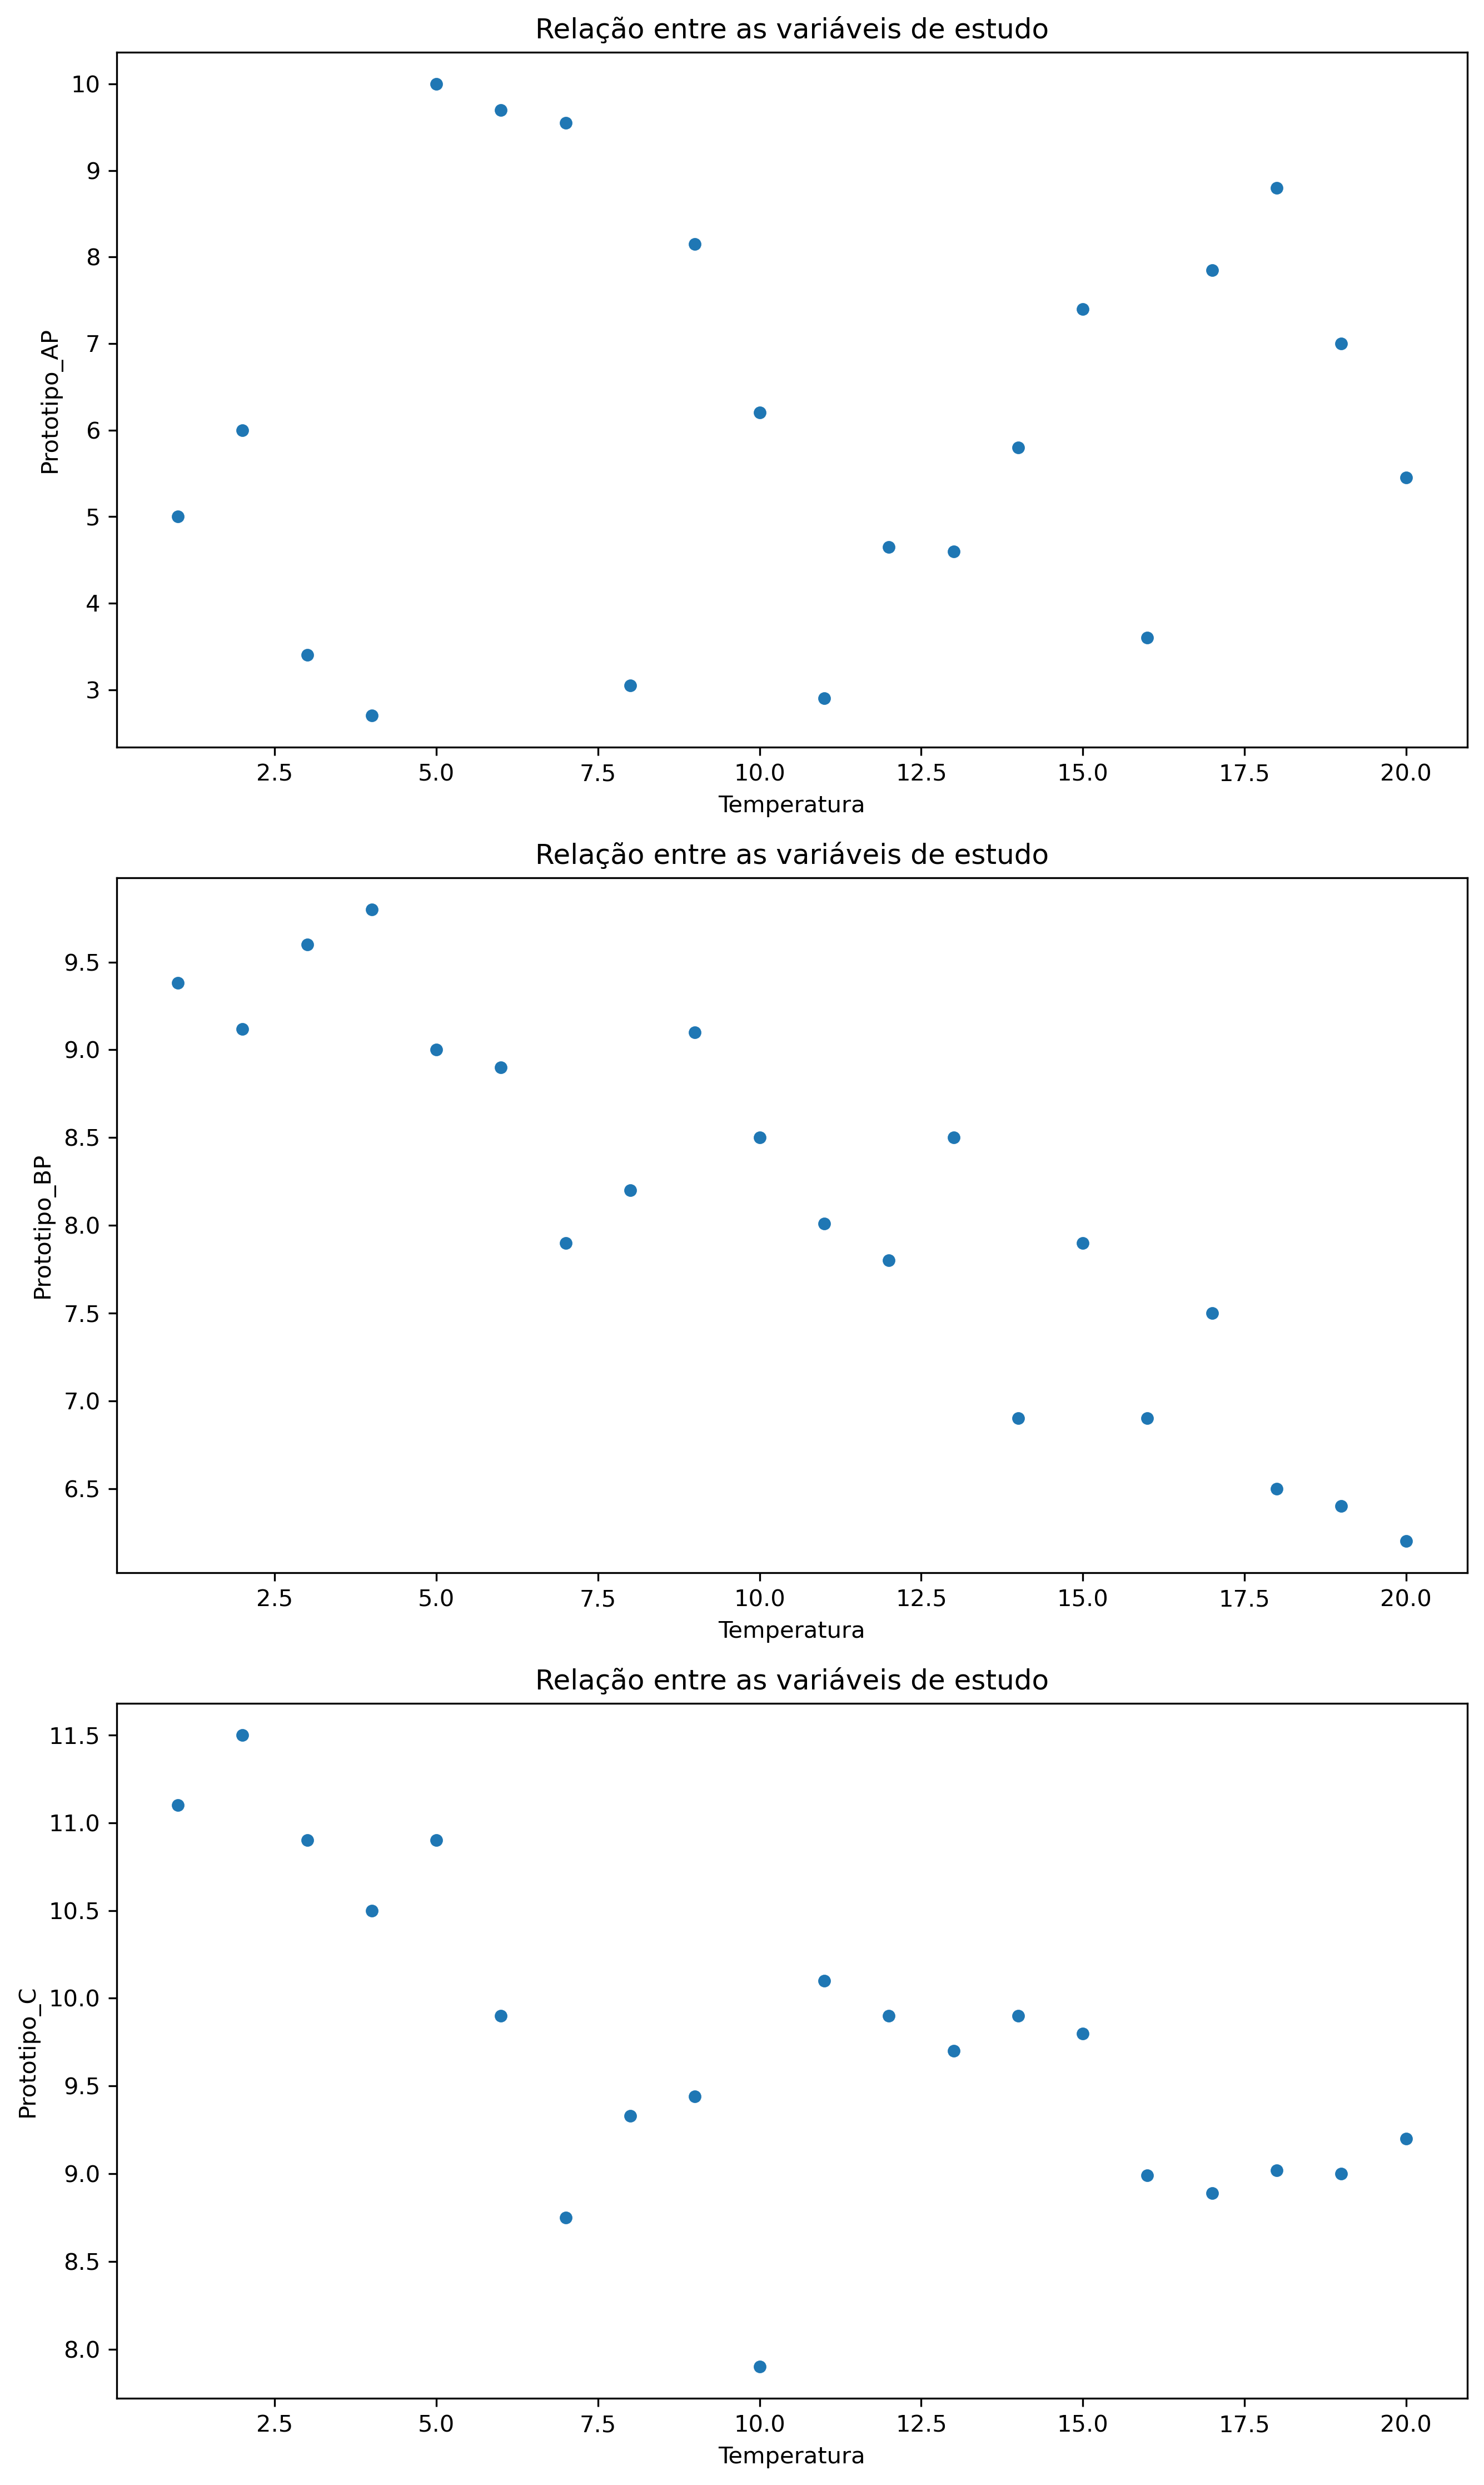

In [43]:
columns = data.columns.tolist()
nrows = 3
fig, ax = plt.subplots(nrows, 1, figsize=(9, 15))
for c in range(nrows):
    data.plot.scatter(ax=ax[c], y=columns[c+1], x='Temperatura')
    ax[c].set_title('Relação entre as variáveis de estudo')
fig.tight_layout()
plt.show()

## Modelo de regressão

In [44]:
x = x = data['Temperatura']
X = sm.add_constant(x)

### Protótipo AP

In [45]:
y = data['Prototipo_AP']

model_ap = ols('Prototipo_AP ~ Temperatura', data=pd.concat([X, y], axis=1))

res_ap = model_ap.fit()
print(f"{res_ap.summary()}")

                            OLS Regression Results                            
Dep. Variable:           Prototipo_AP   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.046
Method:                 Least Squares   F-statistic:                    0.1589
Date:                Sun, 28 May 2023   Prob (F-statistic):              0.695
Time:                        23:15:32   Log-Likelihood:                -45.142
No. Observations:                  20   AIC:                             94.28
Df Residuals:                      18   BIC:                             96.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.6945      1.132      5.030      

In [46]:
print(f"R²: {res_ap.rsquared:.4f}")
print(f"\nP-value: {res_ap.pvalues[1]:.4f}")
print(f"R² ajustado: {res_ap.rsquared_adj:.4f}")
print(f"\n\tCoeficientes\n{res_ap.params}")

R²: 0.0087

P-value: 0.6949
R² ajustado: -0.0463

	Coeficientes
Intercept      5.694474
Temperatura    0.037669
dtype: float64


In [47]:
# nível de confiança
res_ap.conf_int(alpha=0.05)

,0,1
Intercept,3.315898,8.073050
Temperatura,-0.160891,0.236229


#### Visualizando o modelo e traçando a linha de tendência

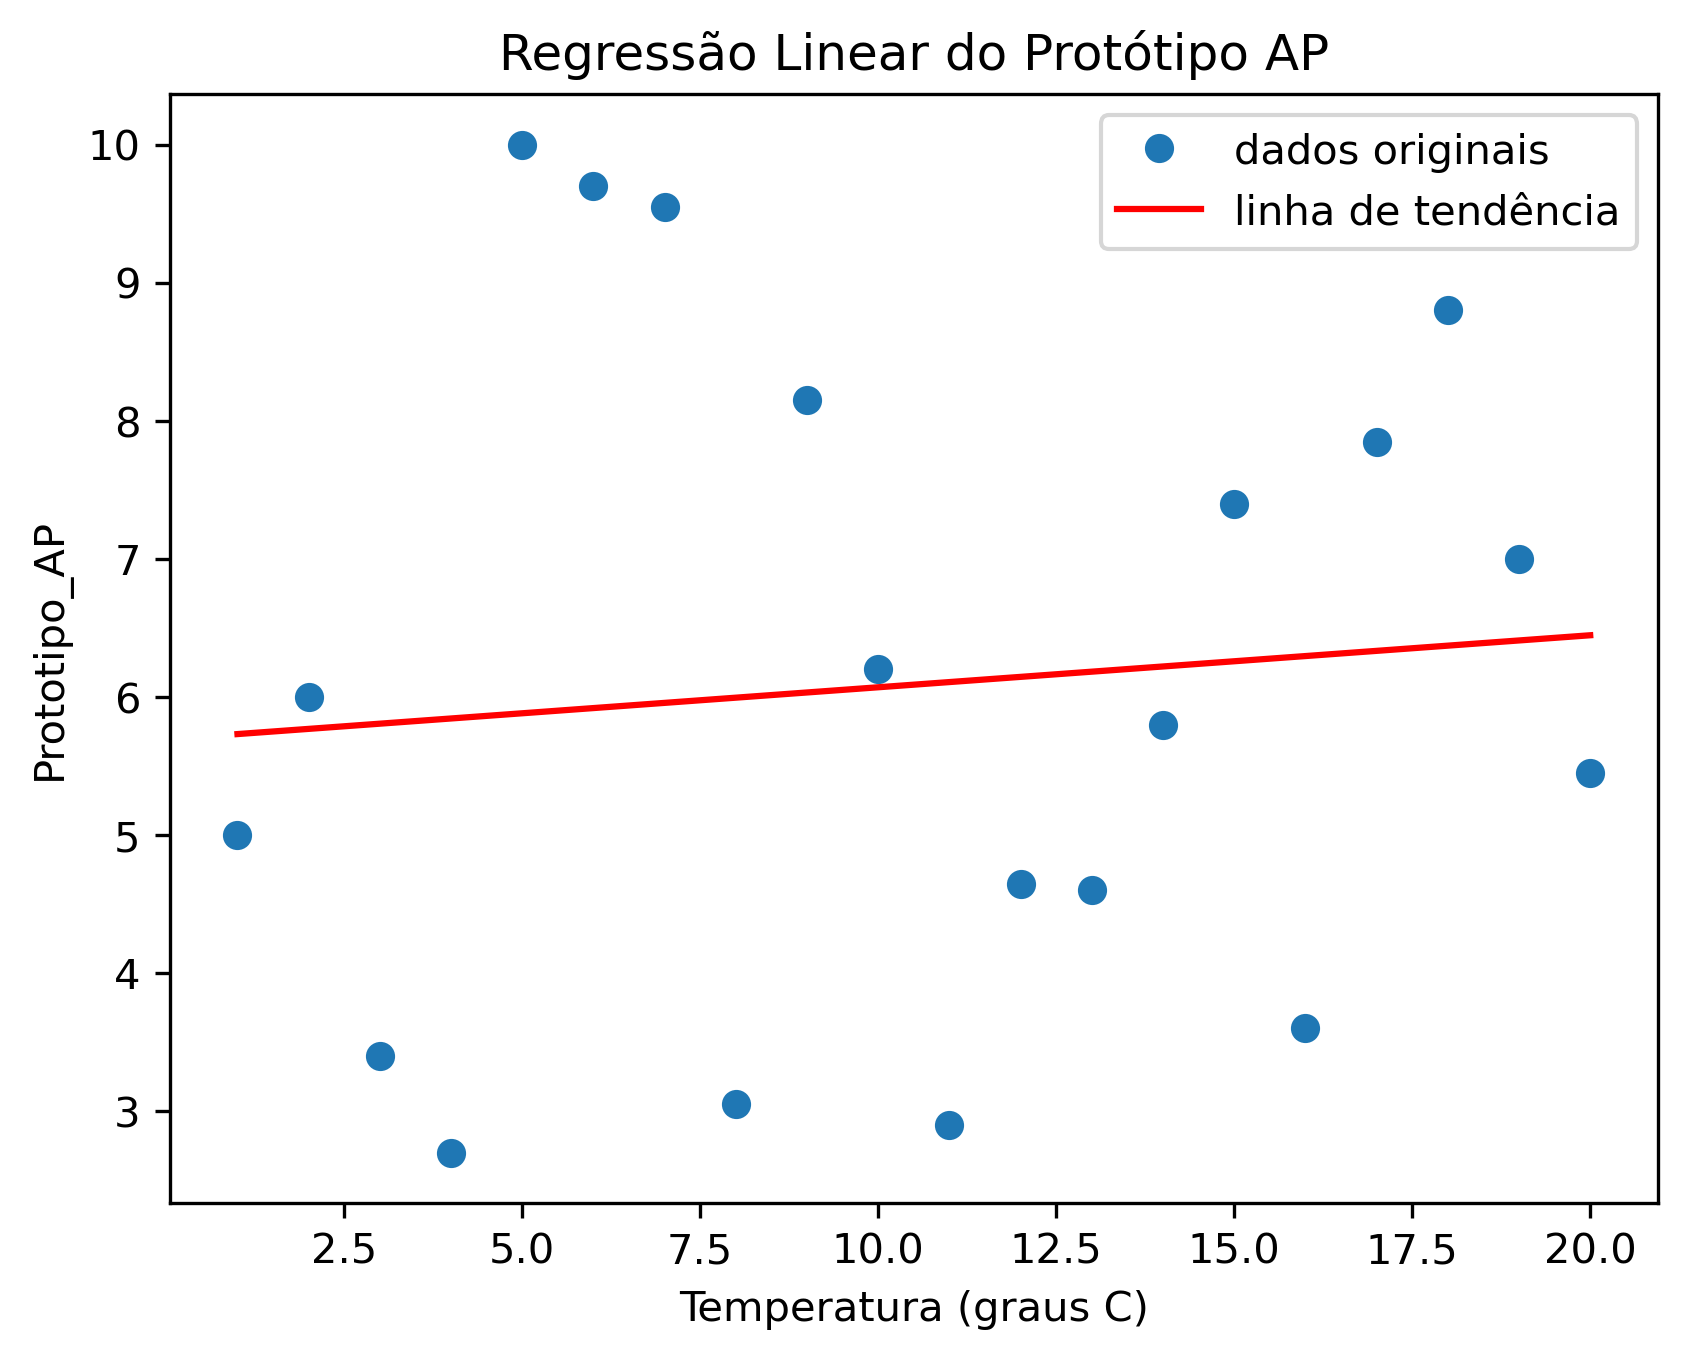

<Figure size 3000x1800 with 0 Axes>

In [48]:
plot_model(data['Temperatura'], y, res_ap, 
          title='Regressão Linear do Protótipo AP'
          )

A maleabilidade do protótipo do tipo AP, aparentemente, não apresenta relação linear com a temperatura exposta.

### Protótipo BP

In [49]:
y = data['Prototipo_BP']

model_bp = ols('Prototipo_BP ~ Temperatura', data=pd.concat([X, y], axis=1))

res_bp = model_bp.fit()
print(f"{res_bp.summary()}")


                            OLS Regression Results                            
Dep. Variable:           Prototipo_BP   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     84.92
Date:                Sun, 28 May 2023   Prob (F-statistic):           3.09e-08
Time:                        23:15:33   Log-Likelihood:                -12.374
No. Observations:                  20   AIC:                             28.75
Df Residuals:                      18   BIC:                             30.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.8822      0.220     44.927      

In [50]:
print(f"R²: {res_bp.rsquared:.4f}")
print(f"\nP-value: {res_bp.pvalues[1]:.4f}")
print(f"R² ajustado: {res_bp.rsquared_adj:.4f}")
print(f"\n\tCoeficientes:\n{res_bp.params}")

R²: 0.8251

P-value: 0.0000
R² ajustado: 0.8154

	Coeficientes:
Intercept      9.882211
Temperatura   -0.169211
dtype: float64


In [51]:
# nível de confiança
res_bp.conf_int(alpha=0.05)

,0,1
Intercept,9.420087,10.344334
Temperatura,-0.207788,-0.130633


#### Visualizando o modelo e traçando a linha de tendência

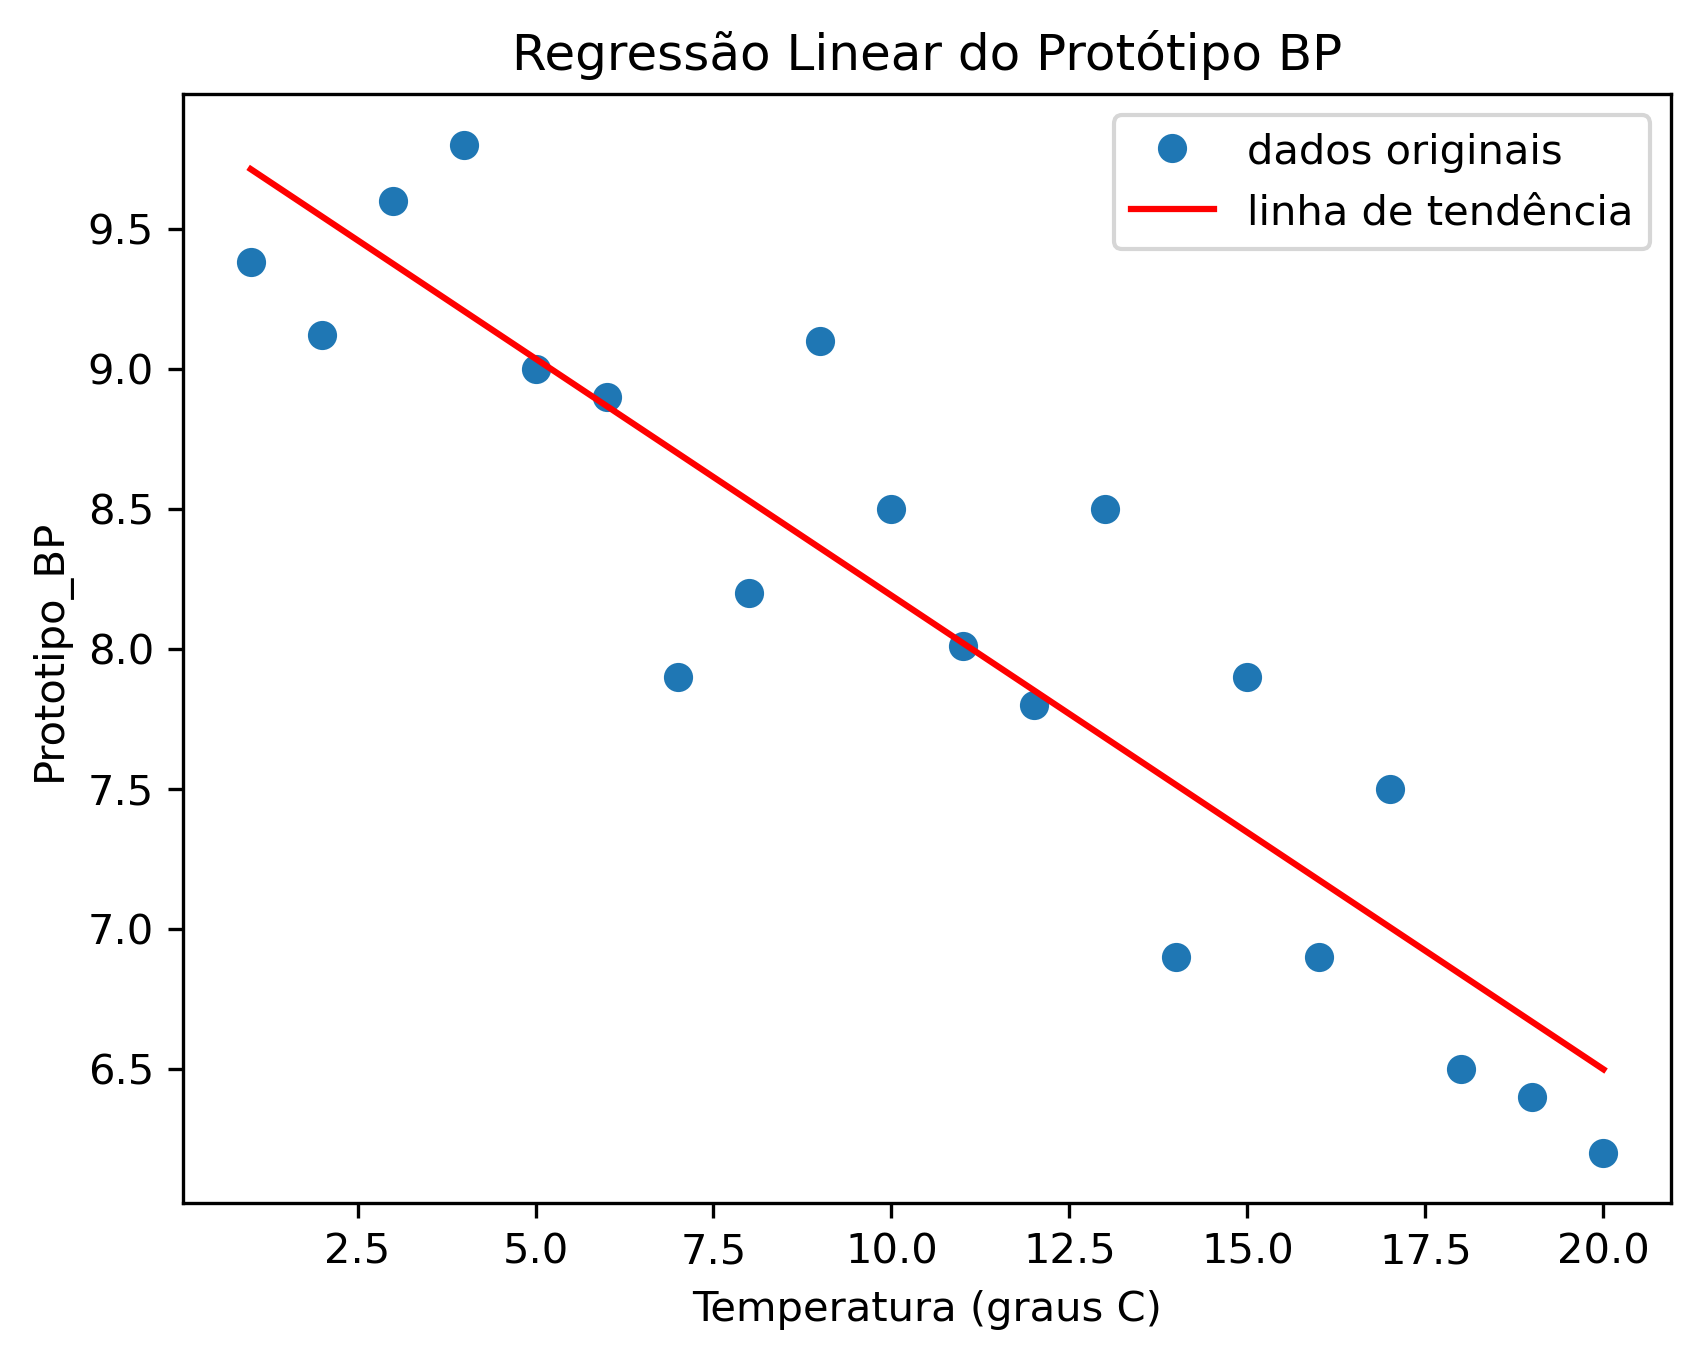

<Figure size 3000x1800 with 0 Axes>

In [52]:
plot_model(x, y, res_bp, title='Regressão Linear do Protótipo BP')

A maleabilidade do protótipo BP apresenta uma relação inversamente proporcional à temperatura exposta, logo, quanto maior a sua temperatura, mais flexível essa película será.

### Protótipo C

In [53]:
y = data['Prototipo_C']


model_c = ols('Prototipo_C ~ Temperatura', data=pd.concat([X, y], axis=1))

res_c = model_c.fit()
print(f"{res_c.summary()}")

                            OLS Regression Results                            
Dep. Variable:            Prototipo_C   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     14.38
Date:                Sun, 28 May 2023   Prob (F-statistic):            0.00133
Time:                        23:15:35   Log-Likelihood:                -20.082
No. Observations:                  20   AIC:                             44.16
Df Residuals:                      18   BIC:                             46.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.8109      0.323     33.429      

In [54]:
print(f"R²: {res_c.rsquared:.4f}")
print(f"\nP-value: {res_c.pvalues[1]:.4f}")
print(f"R² ajustado: {res_c.rsquared_adj:.4f}")
print(f"\n\tCoeficientes:\n{res_c.params}")

R²: 0.4441

P-value: 0.0013
R² ajustado: 0.4132

	Coeficientes:
Intercept      10.810947
Temperatura    -0.102376
dtype: float64


In [55]:
# nível de confiança
res_c.conf_int(alpha=0.05)

,0,1
Intercept,10.131517,11.490377
Temperatura,-0.159094,-0.045658


#### Visualizando o modelo e traçando a linha de tendência

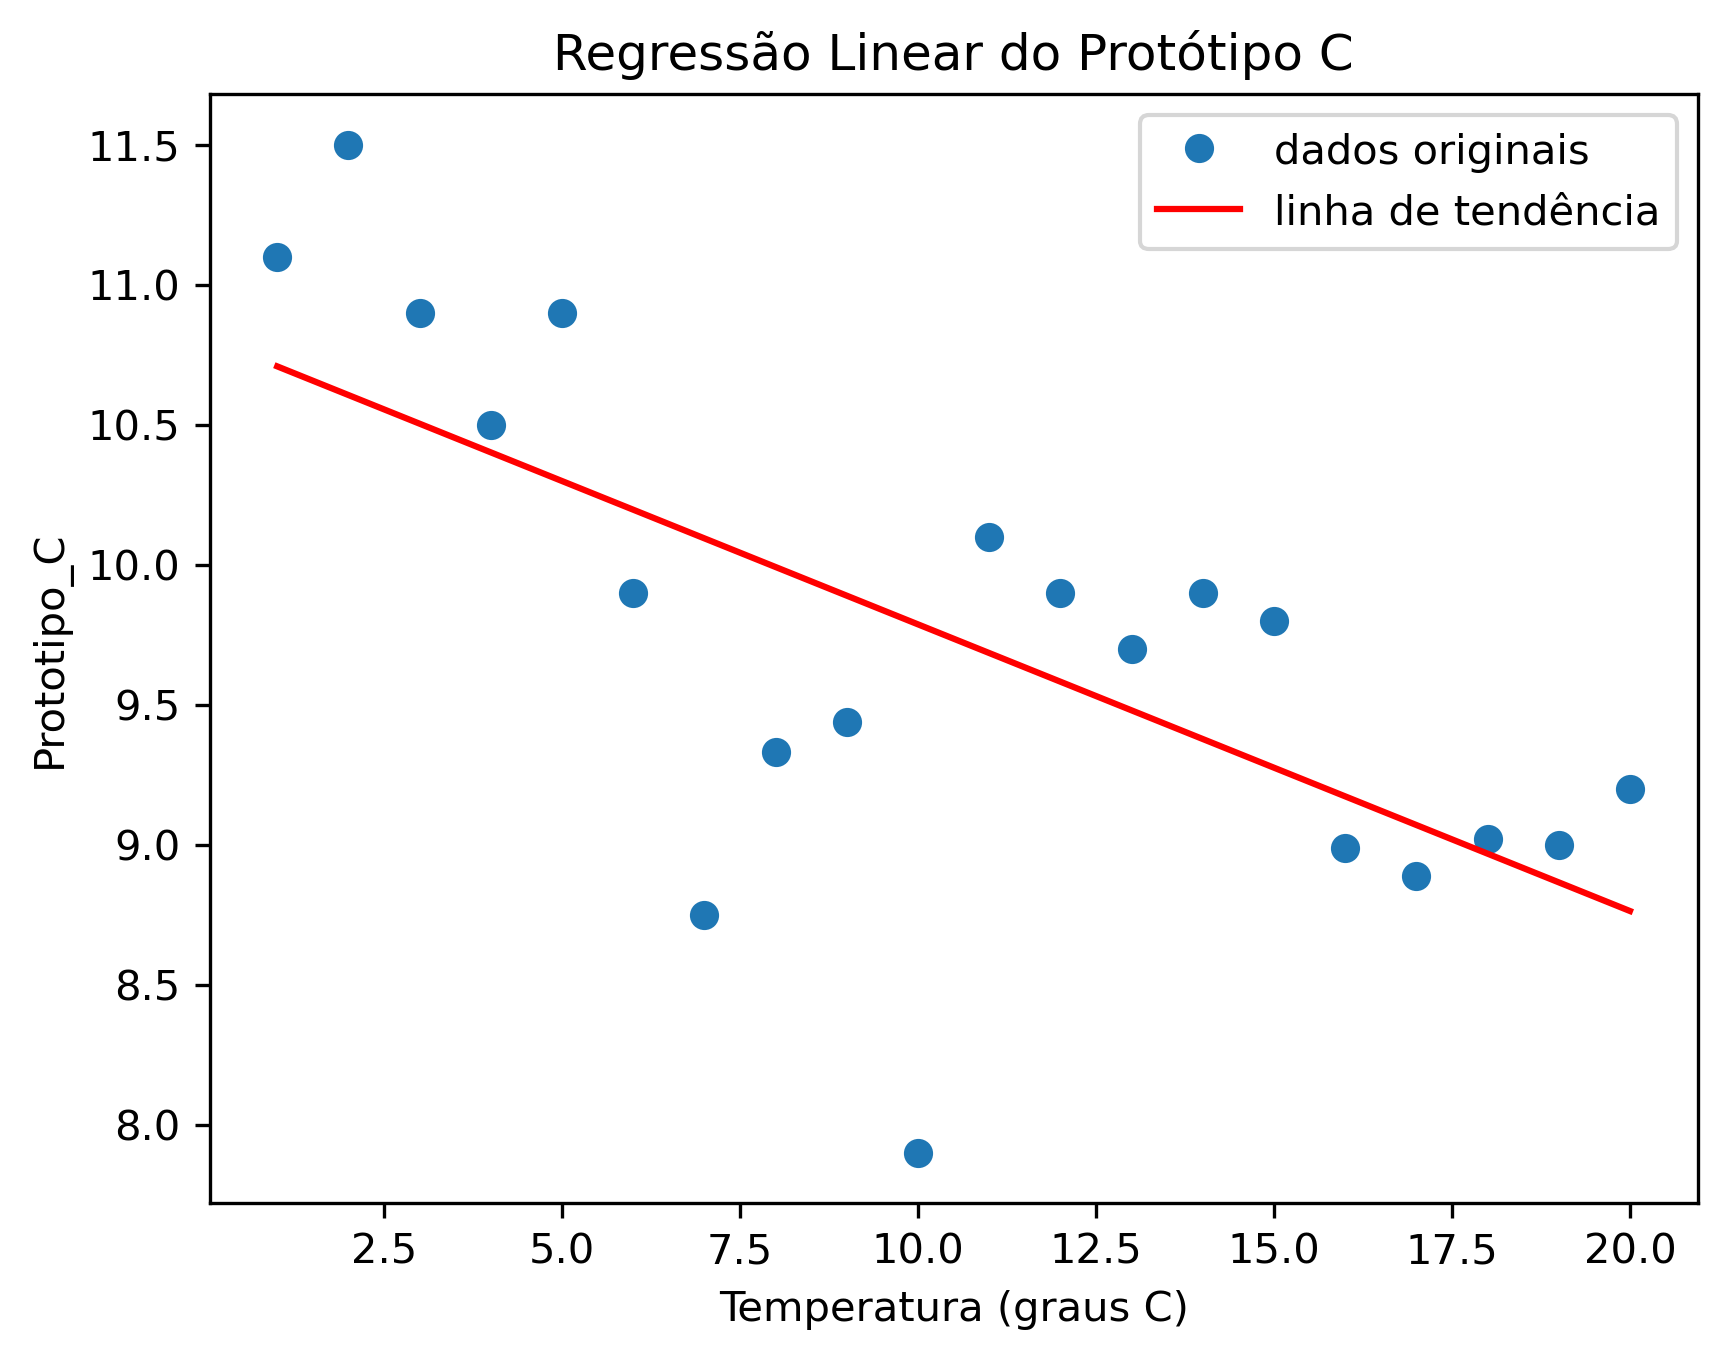

<Figure size 3000x1800 with 0 Axes>

In [56]:
plot_model(x, y, res_c, title='Regressão Linear do Protótipo C')

Semelhante ao protótipo BP, observa-se uma relação inversamente proporcional entre o tipo C e a temperatura exposta. Entretanto, é possível visualizar também que os valores coletados apresentam-se mais distantes da linha de tendência traçada.

## Teste de Hipóteses

Para os modelos de regressão construídos (AP, BP e C), teremos as seguintes regras de decisão:

H<sub>0</sub> -> Não existe regressão

H<sub>1</sub> -> Existe regressão linear

### Informações relevantes sobre os dados

In [57]:
data.describe()

,Temperatura,Prototipo_AP,Prototipo_BP,Prototipo_C
count,20.00000,20.000000,20.000000,20.000000
mean,10.50000,6.090000,8.105500,9.736000
std,5.91608,2.382646,1.102063,0.908836
min,1.00000,2.700000,6.200000,7.900000
25%,5.75000,4.350000,7.350000,9.015000
50%,10.50000,5.900000,8.105000,9.750000
75%,15.25000,7.925000,9.025000,10.200000
max,20.00000,10.000000,9.800000,11.500000


In [58]:
data.shape

(20, 4)

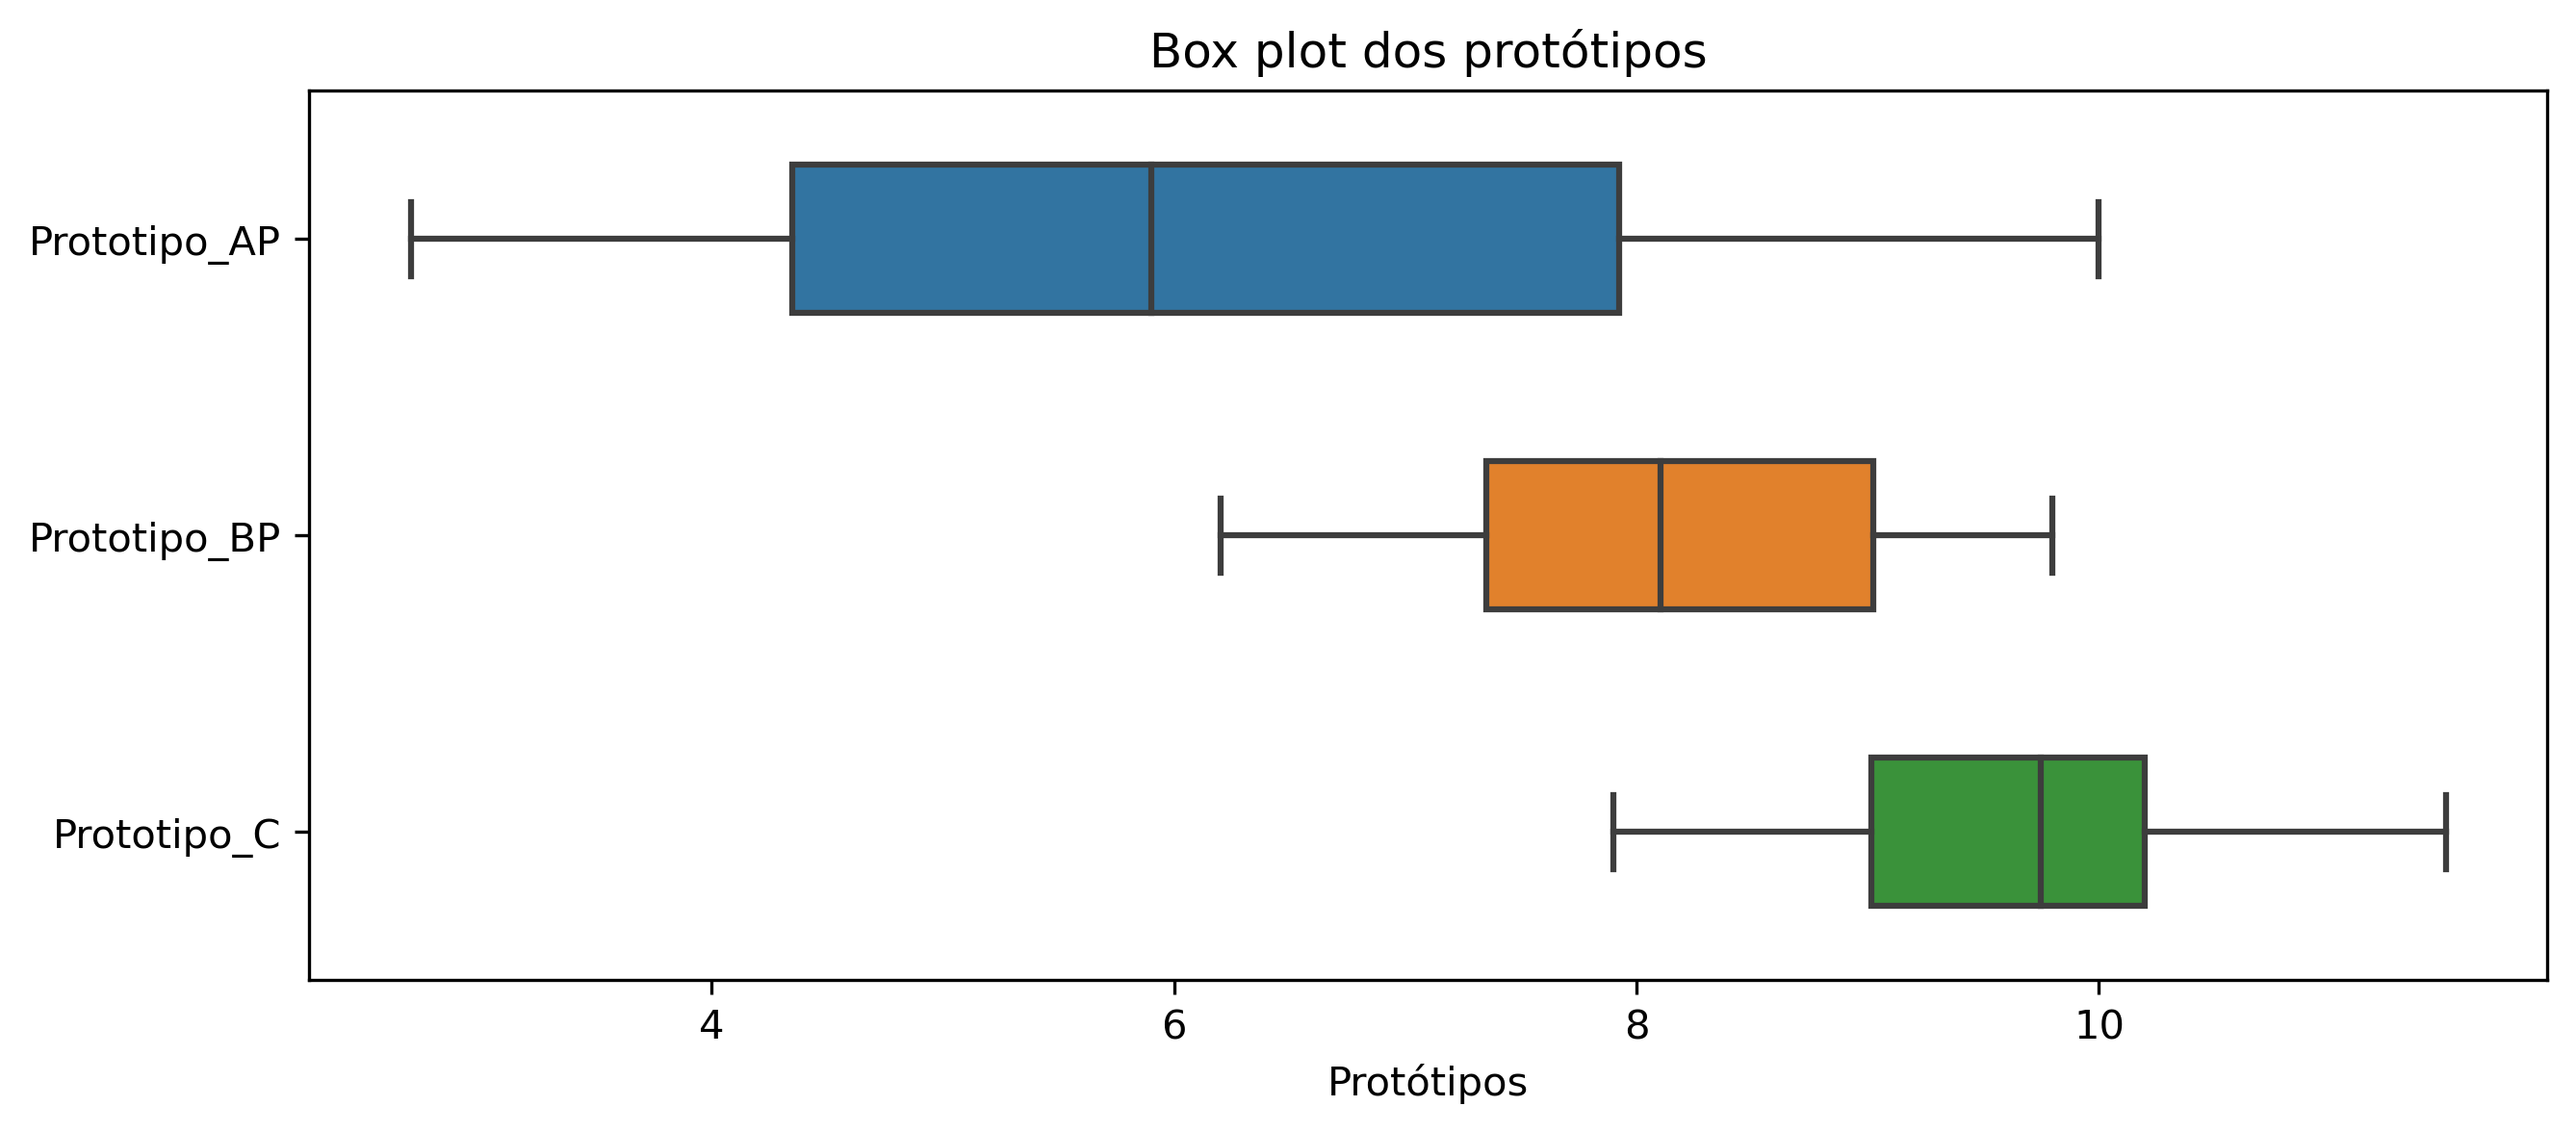

In [59]:
ax = sns.boxplot(data=data[columns[1:]], orient='h', width=0.5)
ax.figure.set_size_inches(10, 4)
ax.set_title('Box plot dos protótipos')
ax.set_xlabel('Protótipos')
plt.show()

É interessante observar que apesar do número relativamente baixo de dados, o protótipo AP traz uma distribuição maior, além de cauxas mais longas, ao comparar com os outros dois tipos. Além disso, visualiza-se que as medianas não estão localizadas no centro das caixas, logo é possível inferir que a distribuição desses dados não é simétrica, sendo as dos protótipos AP e BP mais próximas do centro e a do tipo C mais próxima do 3º quartil, demonstrando que esses dados são assimétricos negativos.

Somado a isso, o protótipo C apresenta a menor distribuição, concentrando seus valores em torno de 9 e 10. Já o tipo BP, apresenta mais anotações em torno de 8 e 9. Vale ressaltar também que não há a presença de outliers nas amostras.

### Visualizando correlações

Pearson

,Temperatura,Prototipo_AP,Prototipo_BP,Prototipo_C
Temperatura,1.000000,0.093532,-0.908354,-0.666417
Prototipo_AP,0.093532,1.000000,-0.126194,-0.204609
Prototipo_BP,-0.908354,-0.126194,1.000000,0.599415
Prototipo_C,-0.666417,-0.204609,0.599415,1.000000


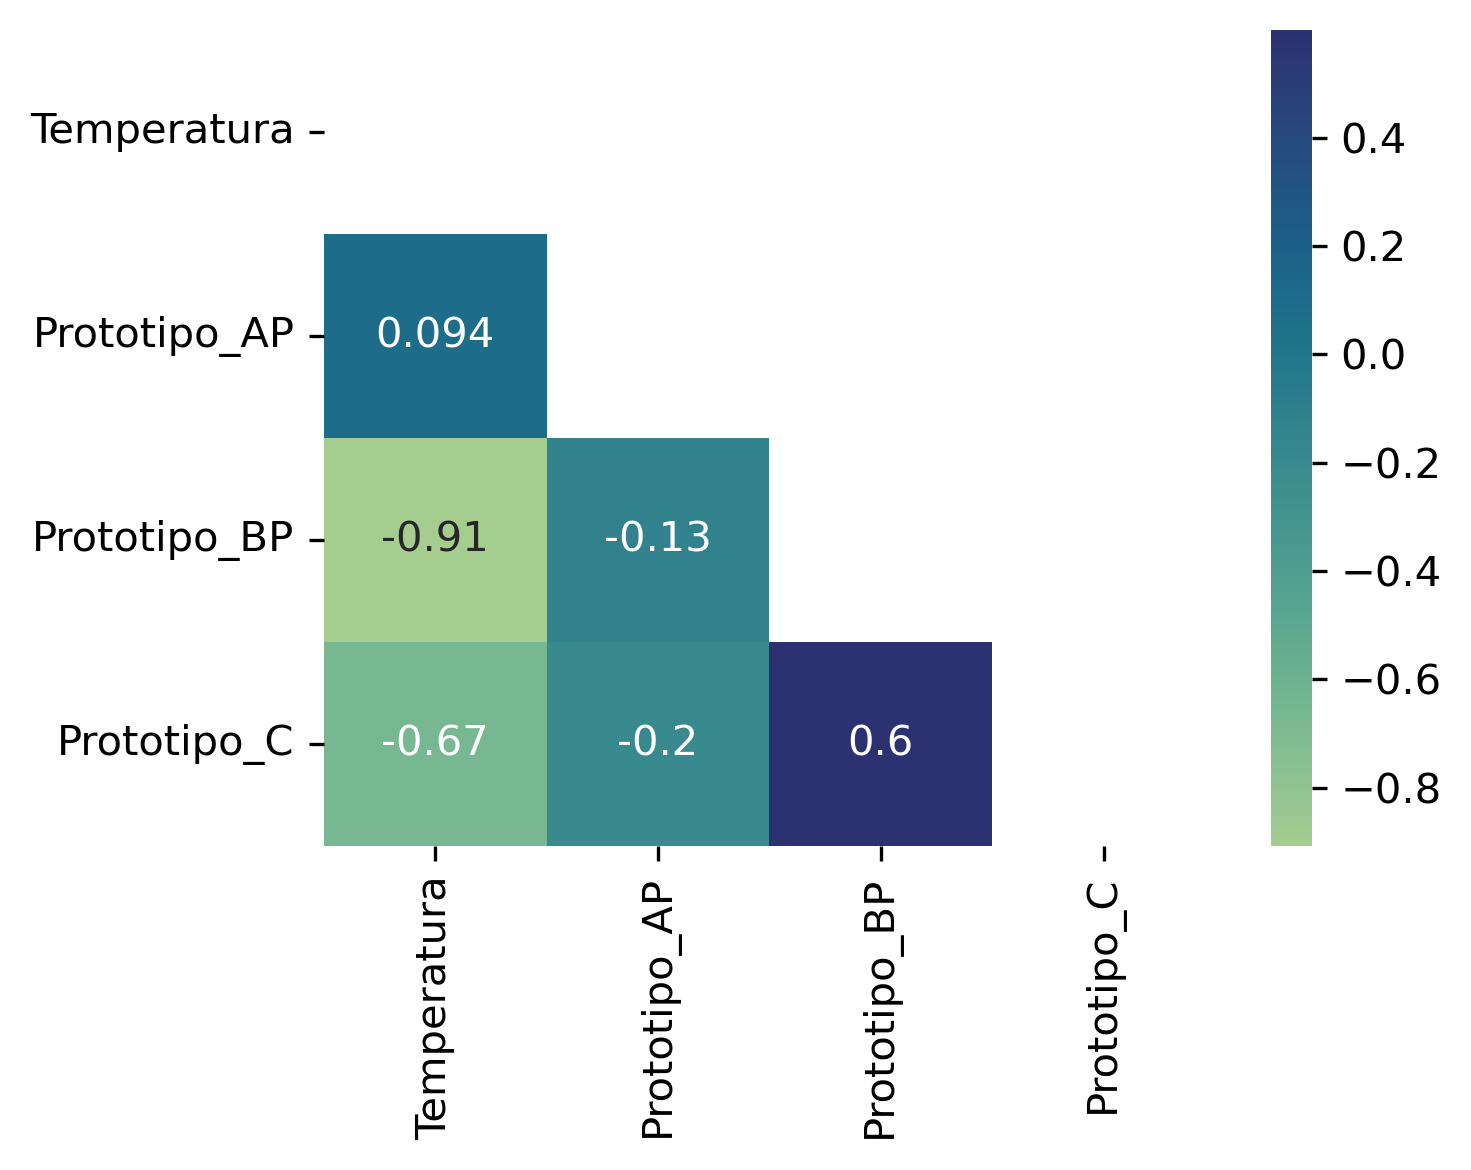

In [60]:
corr = data.corr(method='pearson')
display(corr)

fig, ax = plt.subplots(figsize=(5,4))
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix, cmap="crest", ax=ax)
fig.tight_layout()
plt.show()

Spearman

,Temperatura,Prototipo_AP,Prototipo_BP,Prototipo_C
Temperatura,1.000000,0.106767,-0.914566,-0.661395
Prototipo_AP,0.106767,1.000000,-0.170870,-0.262147
Prototipo_BP,-0.914566,-0.170870,1.000000,0.640272
Prototipo_C,-0.661395,-0.262147,0.640272,1.000000


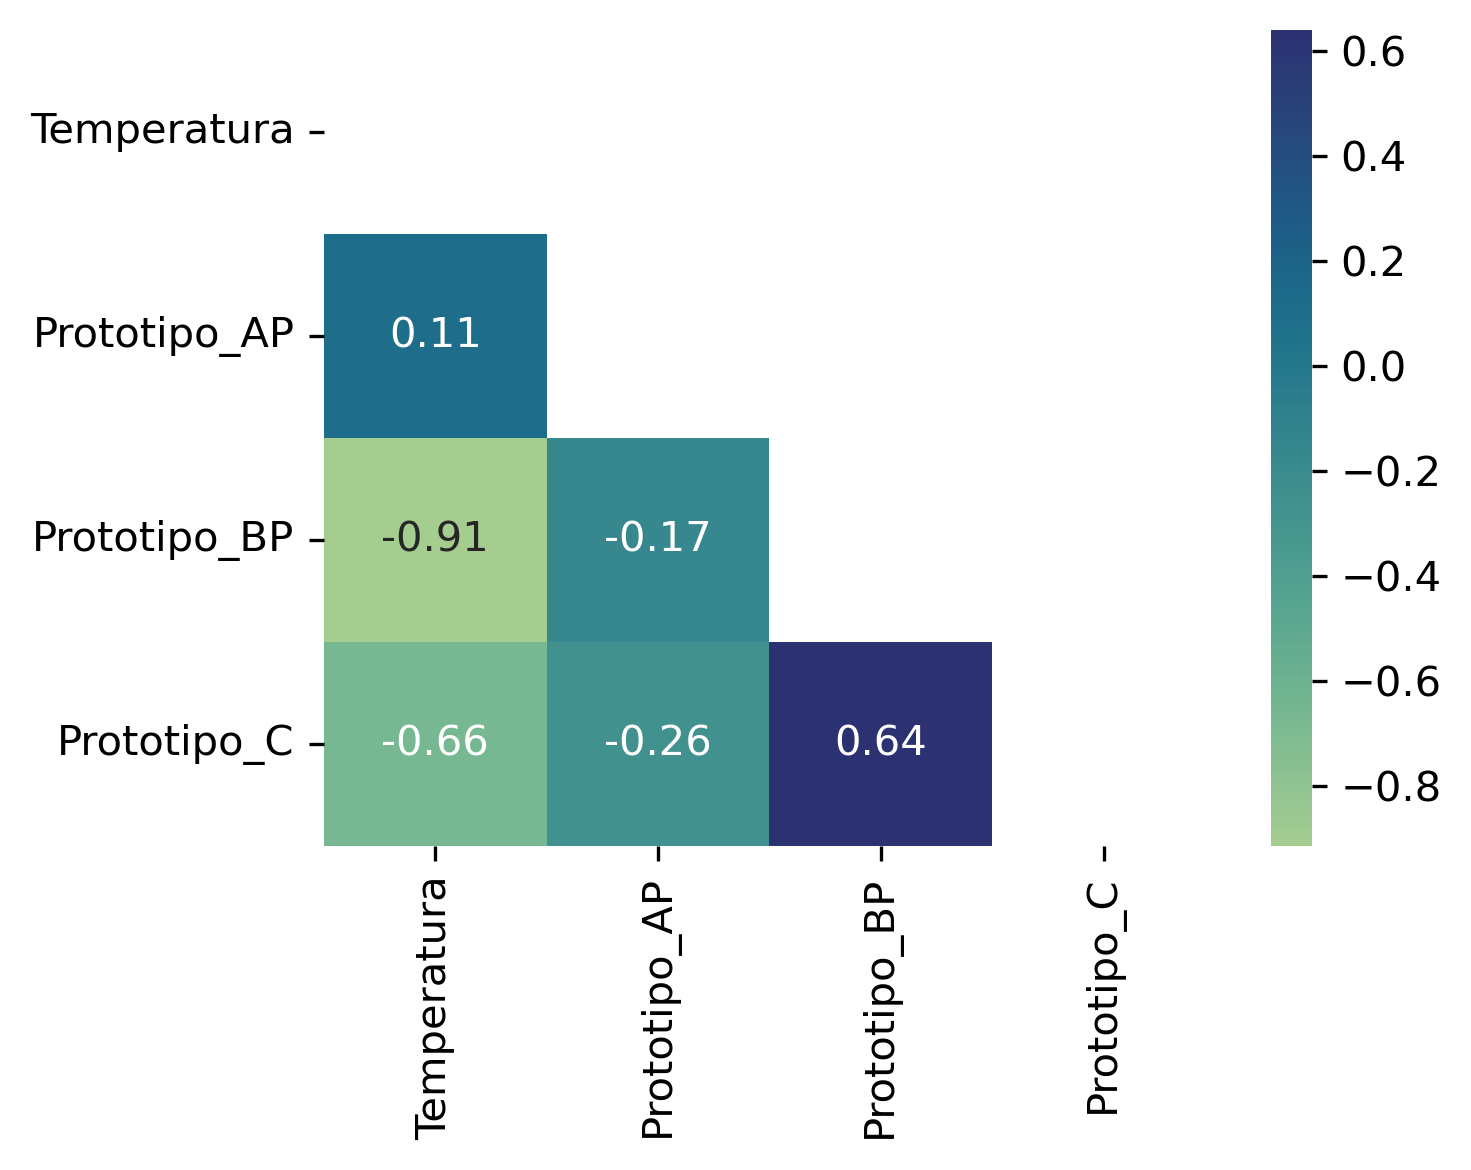

In [61]:
corr = data.corr(method='spearman')
display(corr)

fig, ax = plt.subplots(figsize=(5,4))
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix, cmap="crest", ax=ax)
fig.tight_layout()
plt.show()

As correlações negativas entre os Protótipos BP e C com a Temperatura confirmam a linha de tendência de inclinação negativa apresentada nos gráficos de regressão linear. Além disso, a baixa correlação entre o protótipo AP e a temperatura trazem mais uma confirmação acerca da não existência de regressão linear entre as duas variáveis.

### Aplicando teste ANOVA sobre os modelos de regressão realizados

##### Explicação das variáveis de saída do teste da biblioteca

sum_sq: Soma dos quadrados dos termos do modelo.

df: Graus de liberdade para termos do modelo.

F: Valor da estatística F para significância da adição de termos do modelo.

PR(>F): Valor P para significância da adição de termos do modelo.

Quando os args são vários modelos, o retorno é um DataFrame com colunas:

    df_resid: Graus de liberdade dos resíduos nos modelos.

    ssr: Soma dos quadrados dos resíduos nos modelos.
    
    df_diff: Diferença de graus de liberdade do modelo anterior em argumentos
    
    ss_dff: Diferença em ssr do modelo anterior em argumentos

F: Estatística F comparada ao modelo anterior em argumentos

PR(>F): Valor P para significância em comparação com o modelo anterior em argumentos

#### ANOVA no modelo do protótipo AP

In [62]:
tb_anova_ap = anova_lm(res_ap, typ=1)

display(tb_anova_ap)

,df,sum_sq,mean_sq,F,PR(>F)
Temperatura,1.0,0.943613,0.943613,0.158858,0.694898
Residual,18.0,106.919387,5.939966,NaN,NaN


#### ANOVA no modelo do protótipo BP

In [63]:
tb_anova_bp = anova_lm(res_bp, typ=1)

display(tb_anova_bp)

,df,sum_sq,mean_sq,F,PR(>F)
Temperatura,1.0,19.040414,19.040414,84.92012,3.093651e-08
Residual,18.0,4.035881,0.224216,NaN,NaN


#### ANOVA no modelo do protótipo C

In [64]:
tb_anova_c = anova_lm(res_c, typ=1)

display(tb_anova_c)

,df,sum_sq,mean_sq,F,PR(>F)
Temperatura,1.0,6.969754,6.969754,14.380632,0.001334
Residual,18.0,8.723926,0.484663,NaN,NaN


Observando os testes ANOVA aplicados para os três modelos de regressão e considerando um valor de significância de 0,05, logo 95% de intervalo de confiança, percebe-se que os modelos BP e CP, apresentam valores de PR(>F) menores do que o nível de significância, ou seja, possuem pouca ou nenhuma evidência real de que a hipótese nula é verdadeira, portanto, pode ser descartada e H1 pode ser confirmada. Já, ao analisar os resultados obtidos no teste ANOVA do modelo AP, confirma-se que a hipótese nula seria verdadeira, pois PR(>F) é maior do que o nível de significância. 

Todavia, visualizando os quadrados das médias, em específico as relações de soma da variável preditora (Temperatura) e Residual e a apenas o valor dessa variável, percebe-se que apenas o protótipo BP apresenta um coeficiente de determinação acima de 80%, possuindo, assim, a temperatura com alto poder de predição de maleabilidade desse tipo de película. Enquanto os outros protótipos apresentam fatores bem menores, tendo menos de 10% e cerca de 44% para os tipos AP e C respectivamente.

## Predição para 30 graus

In [65]:
x_ = np.append(x, 30)
X = sm.add_constant(pd.Series(x_, name='Temperatura'))

#### Protótipo AP

In [66]:
preds = res_ap.predict(X)
pred_30 = preds.tail(1).values[0]

print(f"30 graus de temperatura produz uma maleabilidade de, aproximadamente, \
{pred_30:.2f} no protótipo AP.")

30 graus de temperatura produz uma maleabilidade de, aproximadamente, 6.82 no protótipo AP.


#### Protótipo BP

In [67]:
preds = res_bp.predict(X)
pred_30 = preds.tail(1).values[0]

print(f"30 graus de temperatura produz uma maleabilidade de, aproximadamente,\
 {pred_30:.2f} no protótipo BP.")

30 graus de temperatura produz uma maleabilidade de, aproximadamente, 4.81 no protótipo BP.


#### Protótipo C

In [68]:
preds = res_c.predict(X)
pred_30 = preds.tail(1).values[0]

print(f"30 graus de temperatura produz uma maleabilidade de, aproximadamente, \
{pred_30:.2f} no protótipo BP.")

30 graus de temperatura produz uma maleabilidade de, aproximadamente, 7.74 no protótipo BP.


## Visualizando distribuições

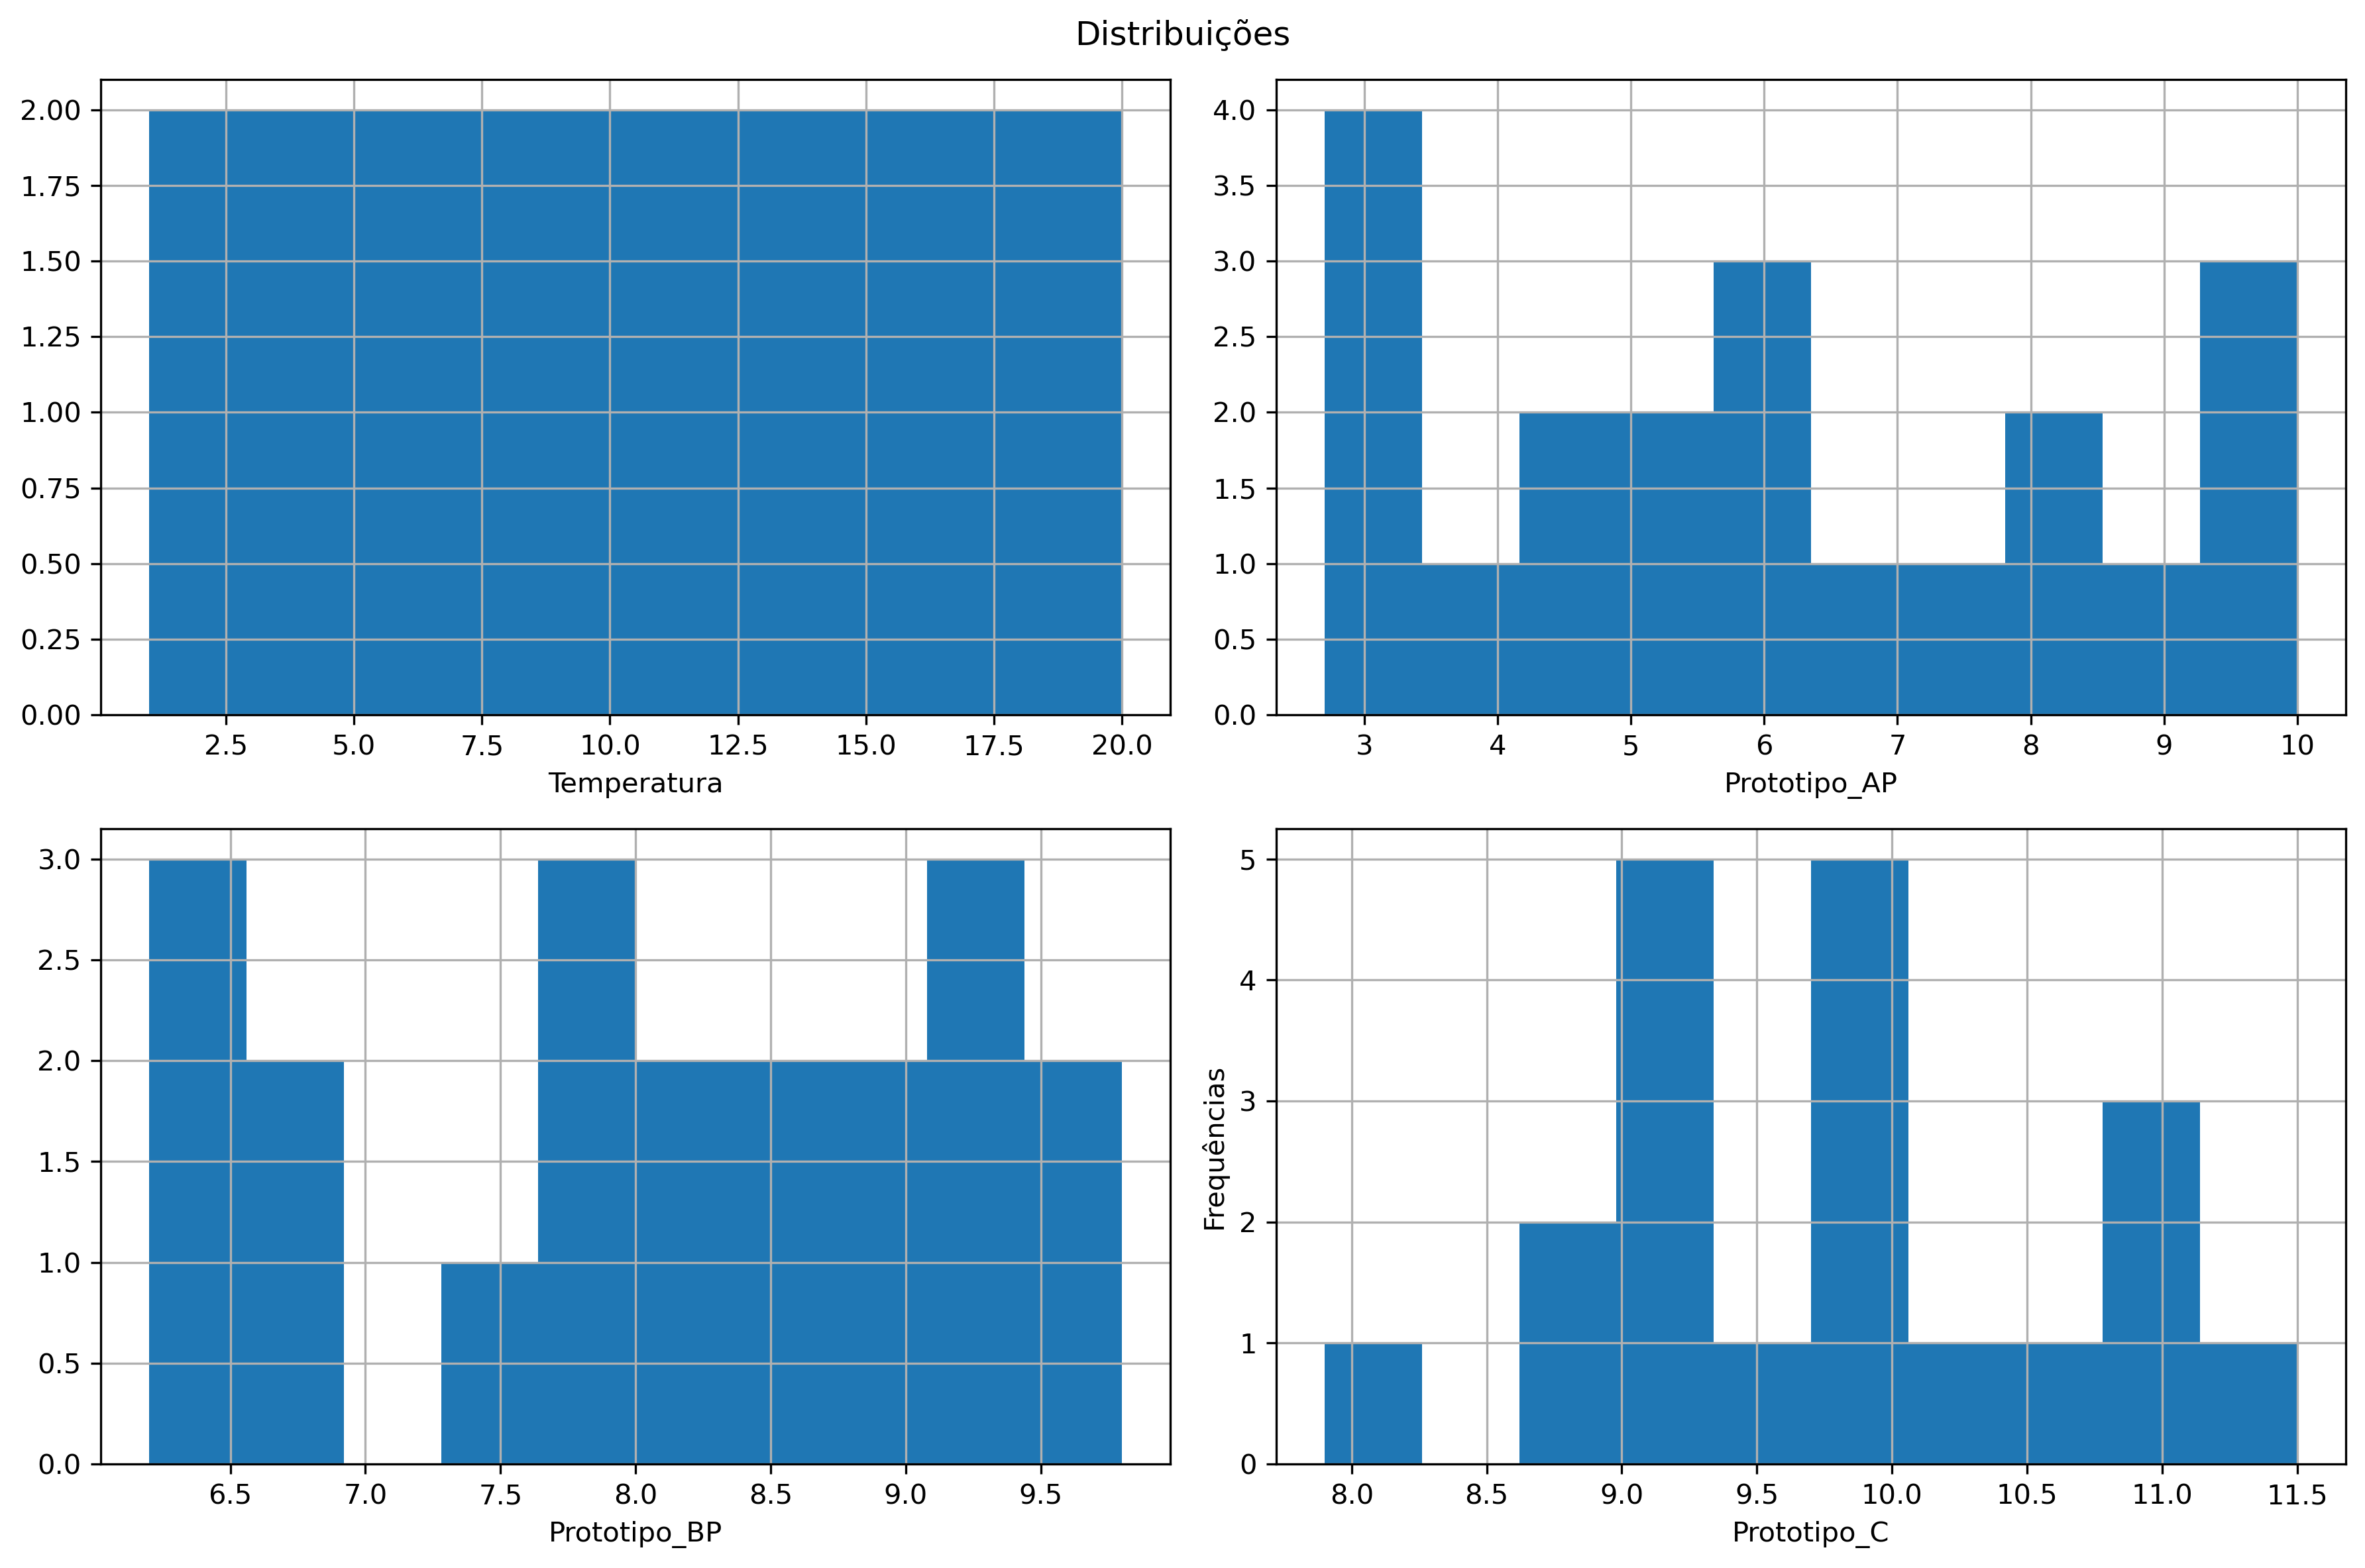

In [69]:
nrows = 2
ncols = 2
fig, ax = plt.subplots(nrows, ncols, figsize=(12, 8))
count = 0
for r in range(nrows):
    for c in range(ncols):
        data[columns[count]].hist(ax=ax[r,  c])
        ax[r, c].set_xlabel(columns[count])
        count += 1
plt.suptitle('Distribuições')
plt.ylabel('Frequências')
fig.tight_layout()
plt.show()

### Aplicando Teste de normalidade sem modelo de regressão

In [70]:
significancia = 0.05
ps_ = []
stats = []
for c in columns[1:]:
    stat_test, p_value = normaltest(data[c])
    ps_.append(p_value)
    stats.append(stat_test)

teste_normal_df = pd.DataFrame({'Statistical Test': stats, 'P value': ps_},
                               index=pd.Index(columns[1:], name='Prototipos')
                               )

display(teste_normal_df)

,Statistical Test,P value
Prototipos,,
Prototipo_AP,2.85662,0.239714
Prototipo_BP,1.93793,0.379476
Prototipo_C,0.16839,0.919252


Verificando de outra maneira se o valor P é menor ou igual à significância

In [71]:
teste_normal_df[['P value']] <= significancia

,P value
Prototipos,
Prototipo_AP,False
Prototipo_BP,False
Prototipo_C,False


Observando o teste ANOVA sobre apenas os dados, sem o modelo de regressão criado, percebe-se que todos os modelos possuem o valor P maior do que o nível de significância. Isso pode ser devido à distribuição das amostras não ser normalizada.

## Conclusão dos resultados

Com a construção do modelo de regressão linear simples, percebeu-se que a maleabilidade dos protótipos pode ser afetada pela temperatura exposta dependendo do tipo de composição do protótipo. Entretanto, a pouca quantidade de dados e a não distruição normal destes pode afetar nos valores obtidos nos modelos, sendo interessante a adição ou a realização novamente desses experimentos a fim de confirmar a manutenção dos valores obtidos.